In [1]:
#Factor Analysis By - Saai Mahesh, Shantanu Paul, Anshitha Sharma

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
#Reading the csv and cleaning the data
df = pd.read_csv("C:/Users/punkl/Desktop/ISBR/6th Tri/Python/bfi.csv")
df.dropna()
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [4]:
#Final df (selecting all required rows and columns)
df = df.iloc[0:,1:26]
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [5]:
#Loading factor analyzer with varimax rotation
fa = FactorAnalyzer(bounds=(0.5, 1),n_factors=6,rotation='varimax')
fa.fit(df)

FactorAnalyzer(bounds=(0.5, 1), n_factors=6, rotation='varimax',
               rotation_kwargs={})

In [6]:
#Getting loadings and eigenvalues
loadings = fa.loadings_
ev,v = fa.get_eigenvalues()

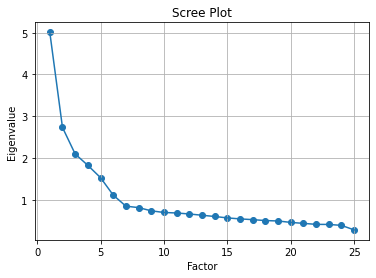

In [7]:
#Doing a scree plot
xvals = range(1,df.shape[1]+1)
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [11]:
#Defining threshold
#Variable should have a rotated factor loading of at least 0.4 to signify it's importance hence it is recoded as 1 else 0.
loadings = np.where(loadings>=0.4,1,0)

In [13]:
#pd.DataFrame.from_records(loadings)
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0
